In [1]:
# Section must be included at the beginning of each new notebook. Remember to change the app name. 
# If you're using VirtualBox, change the below to '/home/user/spark-2.1.1-bin-hadoop2.7'
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()


In [2]:
# Load training data. 
data = spark.read.csv('heart.csv',inferSchema=True,header=True)

In [3]:
# Let's get an idea of what the data looks like. 
data.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- cp: integer (nullable = true)
 |-- trestbps: integer (nullable = true)
 |-- chol: integer (nullable = true)
 |-- fbs: integer (nullable = true)
 |-- restecg: integer (nullable = true)
 |-- thalach: integer (nullable = true)
 |-- exang: integer (nullable = true)
 |-- oldpeak: double (nullable = true)
 |-- slope: integer (nullable = true)
 |-- ca: integer (nullable = true)
 |-- thal: integer (nullable = true)
 |-- target: integer (nullable = true)



In [4]:
data.head()

Row(age=52, sex=1, cp=0, trestbps=125, chol=212, fbs=0, restecg=1, thalach=168, exang=0, oldpeak=1.0, slope=2, ca=2, thal=3, target=0)

In [6]:
data.count()

1025

In [7]:
data.describe().show()

+-------+-----------------+------------------+------------------+------------------+-----------------+-------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+
|summary|              age|               sex|                cp|          trestbps|             chol|                fbs|           restecg|           thalach|              exang|           oldpeak|             slope|                ca|              thal|            target|
+-------+-----------------+------------------+------------------+------------------+-----------------+-------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+
|  count|             1025|              1025|              1025|              1025|             1025|               1025|              1025|              1025|            

In [5]:
data.show(10)

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 52|  1|  0|     125| 212|  0|      1|    168|    0|    1.0|    2|  2|   3|     0|
| 53|  1|  0|     140| 203|  1|      0|    155|    1|    3.1|    0|  0|   3|     0|
| 70|  1|  0|     145| 174|  0|      1|    125|    1|    2.6|    0|  0|   3|     0|
| 61|  1|  0|     148| 203|  0|      1|    161|    0|    0.0|    2|  1|   3|     0|
| 62|  0|  0|     138| 294|  1|      1|    106|    0|    1.9|    1|  3|   2|     0|
| 58|  0|  0|     100| 248|  0|      0|    122|    0|    1.0|    1|  0|   2|     1|
| 58|  1|  0|     114| 318|  0|      2|    140|    0|    4.4|    0|  3|   1|     0|
| 55|  1|  0|     160| 289|  0|      0|    145|    1|    0.8|    1|  1|   3|     0|
| 46|  1|  0|     120| 249|  0|      0|    144|    0|    0.8|    2|  0|   3|

In [15]:
#################################Data exploration #####################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # this is used for the plot the graph
#import seaborn as sns  # used for plot interactive graph.
import scipy.stats as ss

df = pd.read_csv('heart.csv')


/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


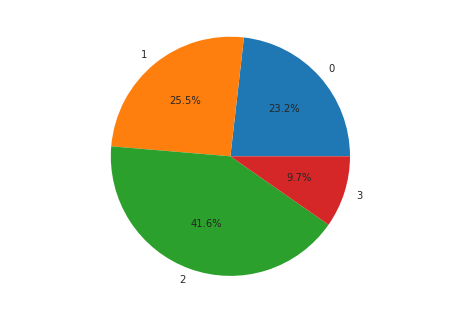

__________________________cp__________________________


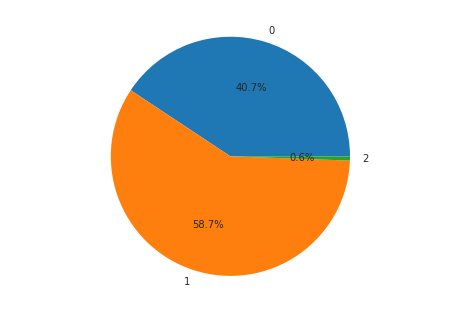

_______________________restecg__________________________


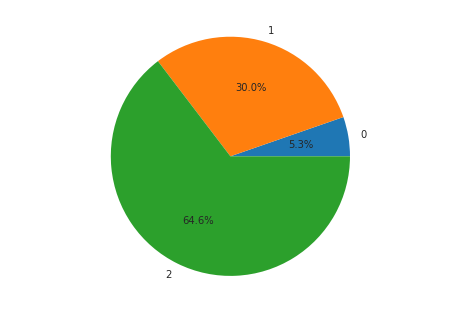

________________________slope__________________________


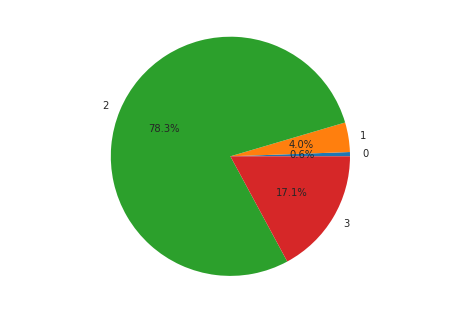

________________________thal__________________________


In [25]:
sums = df.groupby(df["cp"])["target"].sum()
plt.axis('equal')
plt.pie(sums, labels=sums.index, autopct='%1.1f%%')
plt.show()
print("__________________________cp__________________________")
sums = df.groupby(df["restecg"])["target"].sum()
plt.axis('equal')
plt.pie(sums, labels=sums.index, autopct='%1.1f%%')
plt.show()
print("_______________________restecg__________________________")
sums = df.groupby(df["slope"])["target"].sum()
plt.axis('equal')
plt.pie(sums, labels=sums.index, autopct='%1.1f%%')
plt.show()
print("________________________slope__________________________")
sums = df.groupby(df["thal"])["target"].sum()
plt.axis('equal')
plt.pie(sums, labels=sums.index, autopct='%1.1f%%')
plt.show()
print("________________________thal__________________________")

In [17]:
print("age")
print("Count:"+str(len(df.age)))
print("Mean:"+str(np.nanmean(df.age)))
print("Min:"+str(np.nanmin(df.age)))
print("Max:"+str(np.nanmax(df.age)))
print("Range:"+str(np.nanmax(df.age)-np.nanmin(df.age)))
print("Variance:"+str(np.nanvar(df.age)))
print("Standard Deviation:"+str(np.nanstd(df.age)))
print("Standard Error of Mean:"+str(ss.sem(df.age)))

print("trestbps")
print("Count:"+str(len(df.trestbps)))
print("Mean:"+str(np.nanmean(df.trestbps)))
print("Min:"+str(np.nanmin(df.trestbps)))
print("Max:"+str(np.nanmax(df.trestbps)))
print("Range:"+str(np.nanmax(df.trestbps)-np.nanmin(df.trestbps)))
print("Variance:"+str(np.nanvar(df.trestbps)))
print("Standard Deviation:"+str(np.nanstd(df.trestbps)))
print("Standard Error of Mean:"+str(ss.sem(df.trestbps)))

print("thalach")
print("Count:"+str(len(df.thalach)))
print("Mean:"+str(np.nanmean(df.thalach)))
print("Min:"+str(np.nanmin(df.thalach)))
print("Max:"+str(np.nanmax(df.thalach)))
print("Range:"+str(np.nanmax(df.thalach)-np.nanmin(df.thalach)))
print("Variance:"+str(np.nanvar(df.thalach)))
print("Standard Deviation:"+str(np.nanstd(df.thalach)))
print("Standard Error of Mean:"+str(ss.sem(df.thalach)))

print("oldpeak")
print("Count:"+str(len(df.oldpeak)))
print("Mean:"+str(np.nanmean(df.oldpeak)))
print("Min:"+str(np.nanmin(df.oldpeak)))
print("Max:"+str(np.nanmax(df.oldpeak)))
print("Range:"+str(np.nanmax(df.oldpeak)-np.nanmin(df.oldpeak)))
print("Variance:"+str(np.nanvar(df.oldpeak)))
print("Standard Deviation:"+str(np.nanstd(df.oldpeak)))
print("Standard Error of Mean:"+str(ss.sem(df.oldpeak)))

print("chol")
print("Count:"+str(len(df.chol)))
print("Mean:"+str(np.nanmean(df.chol)))
print("Min:"+str(np.nanmin(df.chol)))
print("Max:"+str(np.nanmax(df.chol)))
print("Range:"+str(np.nanmax(df.chol)-np.nanmin(df.chol)))
print("Variance:"+str(np.nanvar(df.chol)))
print("Standard Deviation:"+str(np.nanstd(df.chol)))
print("Standard Error of Mean:"+str(ss.sem(df.chol)))

print("ca")
print("Count:"+str(len(df.ca)))
print("Mean:"+str(np.nanmean(df.ca)))
print("Min:"+str(np.nanmin(df.ca)))
print("Max:"+str(np.nanmax(df.ca)))
print("Range:"+str(np.nanmax(df.ca)-np.nanmin(df.ca)))
print("Variance:"+str(np.nanvar(df.ca)))
print("Standard Deviation:"+str(np.nanstd(df.ca)))
print("Standard Error of Mean:"+str(ss.sem(df.ca)))

age
Count:1025
Mean:54.43414634146342
Min:29
Max:77
Range:48
Variance:82.22615110053539
Standard Deviation:9.067863645894516
Standard Error of Mean:0.28337073893420367
trestbps
Count:1025
Mean:131.61170731707318
Min:94
Max:200
Range:106
Variance:306.53605806067816
Standard Deviation:17.508171179785688
Standard Error of Mean:0.5471303493683027
thalach
Count:1025
Mean:149.11414634146342
Min:71
Max:202
Range:131
Variance:528.7469706127305
Standard Deviation:22.994498703227485
Standard Error of Mean:0.7185780844758589
oldpeak
Count:1025
Mean:1.0715121951219515
Min:0.0
Max:6.2
Range:6.2
Variance:1.3794030791195717
Standard Deviation:1.1744799185680324
Standard Error of Mean:0.03670249745525101
chol
Count:1025
Mean:246.0
Min:126
Max:564
Range:438
Variance:2659.190243902439
Standard Deviation:51.56733698672483
Standard Error of Mean:1.6114792808351512
ca
Count:1025
Mean:0.7541463414634146
Min:0
Max:4
Range:4
Variance:1.0615071980963713
Standard Deviation:1.0302947141941334
Standard Error of M

/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


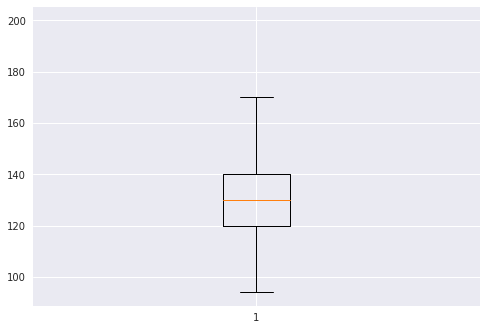

________________________trestbps__________________________


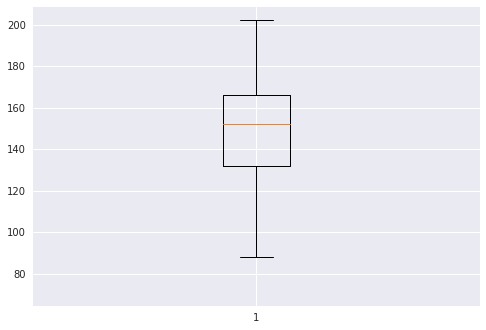

________________________thalach__________________________


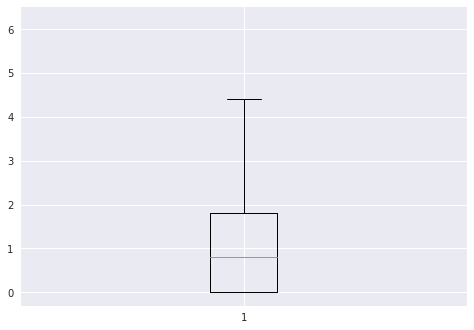

________________________oldpeak__________________________


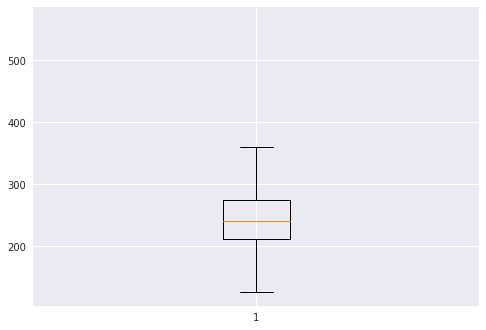

________________________chol__________________________


In [26]:
###########Clean beofre##############
plt.boxplot(df.trestbps)
plt.show()
print("________________________trestbps__________________________")

plt.boxplot(df.thalach)
plt.show()
print("________________________thalach__________________________")

plt.boxplot(df.oldpeak)
plt.show()
print("________________________oldpeak__________________________")

plt.boxplot(df.chol)
plt.show()
print("________________________chol__________________________")

In [30]:
data = data.filter("thalach >=80")
data = data.filter("trestbps <=180")
data = data.filter("oldpeak<=5")
data = data.filter("chol <=400")
data = data.drop_duplicates()

data.describe().show()


# Let's visualise the columns to help with assembly. 
data.columns

+-------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+-------------------+
|summary|               age|               sex|                cp|          trestbps|              chol|                fbs|           restecg|           thalach|              exang|           oldpeak|             slope|                ca|              thal|             target|
+-------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+-------------------+
|  count|               293|               293|               293|               293|               293|                293|               293|               293| 

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [31]:
data.count()

293

/home/ubuntu/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


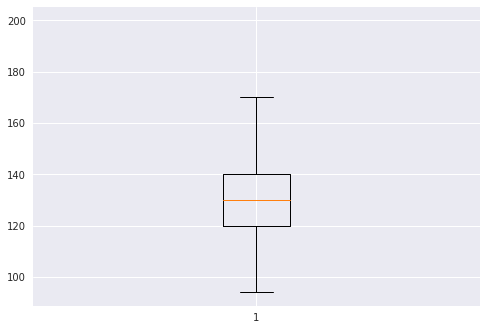

________________________trestbps__________________________


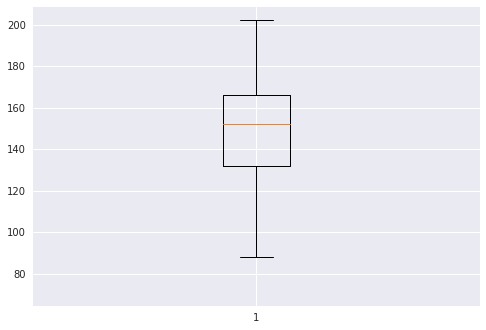

________________________thalach__________________________


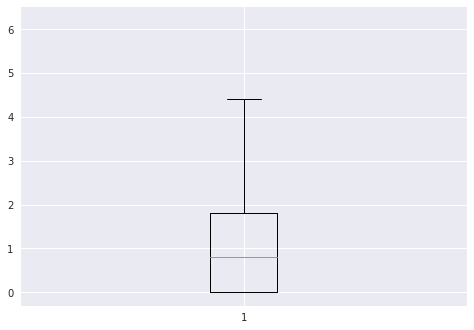

________________________oldpeak__________________________


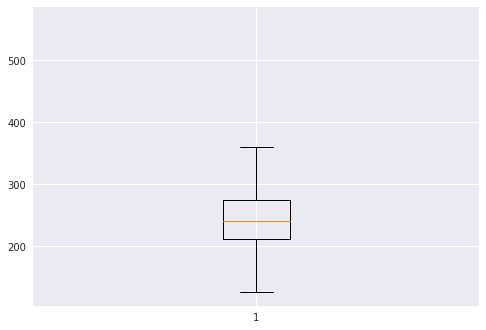

________________________chol__________________________


In [28]:
########  After clean
plt.boxplot(df.trestbps)
plt.show()
print("________________________trestbps__________________________")

plt.boxplot(df.thalach)
plt.show()
print("________________________thalach__________________________")

plt.boxplot(df.oldpeak)
plt.show()
print("________________________oldpeak__________________________")

plt.boxplot(df.chol)
plt.show()
print("________________________chol__________________________")

In [32]:
# A few things we need to do before Spark can accept the data!
# It needs to be in the form of two columns: "label" and "features".

# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [33]:
# Combine all features into one vector named features.
assembler = VectorAssembler(
  inputCols=['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal'],
outputCol="features")

In [34]:
# Let's transform the data. 
output = assembler.transform(data)

In [35]:
# Let's import the string indexer (similar to the logistic regression exercises).
from pyspark.ml.feature import StringIndexer

In [36]:
indexer = StringIndexer(inputCol="target", outputCol="targetIndex")
output_fixed = indexer.fit(output).transform(output)

In [37]:
# Let's select the two columns we want. Features (which contains vectors), and the predictor.
final_data = output_fixed.select("features",'targetIndex')

In [38]:
# Split the training and testing set.
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [39]:
# Let's import the relevant classifiers. 
from pyspark.ml.classification import DecisionTreeClassifier,GBTClassifier,RandomForestClassifier
from pyspark.ml import Pipeline

In [40]:
# Use defaults to make the comparison "fair". This simplifies the comparison process.

dtc = DecisionTreeClassifier(labelCol='targetIndex',featuresCol='features')
rfc = RandomForestClassifier(labelCol='targetIndex',featuresCol='features')
gbt = GBTClassifier(labelCol='targetIndex',featuresCol='features')

In [41]:
# Train the models (it's three models, so it might take some time).
dtc_model = dtc.fit(train_data)
rfc_model = rfc.fit(train_data)
gbt_model = gbt.fit(train_data)

In [42]:
dtc_predictions = dtc_model.transform(test_data)
rfc_predictions = rfc_model.transform(test_data)
gbt_predictions = gbt_model.transform(test_data)

In [43]:
print (dtc_model.toDebugString)

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_4d37a746a896ee40c626) of depth 5 with 41 nodes
  If (feature 2 <= 0.0)
   If (feature 11 <= 0.0)
    If (feature 12 <= 2.0)
     If (feature 8 <= 0.0)
      If (feature 4 <= 308.0)
       Predict: 0.0
      Else (feature 4 > 308.0)
       Predict: 0.0
     Else (feature 8 > 0.0)
      If (feature 6 <= 0.0)
       Predict: 0.0
      Else (feature 6 > 0.0)
       Predict: 1.0
    Else (feature 12 > 2.0)
     If (feature 7 <= 158.0)
      Predict: 1.0
     Else (feature 7 > 158.0)
      If (feature 4 <= 234.0)
       Predict: 0.0
      Else (feature 4 > 234.0)
       Predict: 1.0
   Else (feature 11 > 0.0)
    If (feature 9 <= 0.3)
     If (feature 1 <= 0.0)
      Predict: 0.0
     Else (feature 1 > 0.0)
      If (feature 7 <= 109.0)
       Predict: 0.0
      Else (feature 7 > 109.0)
       Predict: 1.0
    Else (feature 9 > 0.3)
     Predict: 1.0
  Else (feature 2 > 0.0)
   If (feature 9 <= 2.0)
    If (feature 10 <= 1.0)
     I

In [44]:
print (rfc_model.toDebugString)

RandomForestClassificationModel (uid=rfc_bc88be10daf1) with 20 trees
  Tree 0 (weight 1.0):
    If (feature 11 <= 0.0)
     If (feature 10 <= 1.0)
      If (feature 9 <= 0.0)
       Predict: 0.0
      Else (feature 9 > 0.0)
       If (feature 1 <= 0.0)
        If (feature 0 <= 55.0)
         Predict: 0.0
        Else (feature 0 > 55.0)
         Predict: 1.0
       Else (feature 1 > 0.0)
        If (feature 8 <= 0.0)
         Predict: 1.0
        Else (feature 8 > 0.0)
         Predict: 1.0
     Else (feature 10 > 1.0)
      If (feature 0 <= 57.0)
       If (feature 2 <= 0.0)
        If (feature 1 <= 0.0)
         Predict: 0.0
        Else (feature 1 > 0.0)
         Predict: 0.0
       Else (feature 2 > 0.0)
        Predict: 0.0
      Else (feature 0 > 57.0)
       If (feature 4 <= 322.0)
        If (feature 2 <= 0.0)
         Predict: 0.0
        Else (feature 2 > 0.0)
         Predict: 0.0
       Else (feature 4 > 322.0)
        If (feature 7 <= 151.0)
         Predict: 0.0
        El

In [45]:
print (gbt_model.toDebugString)

GBTClassificationModel (uid=GBTClassifier_4ce3bd9f316a4276a411) with 20 trees
  Tree 0 (weight 1.0):
    If (feature 2 <= 0.0)
     If (feature 11 <= 0.0)
      If (feature 12 <= 2.0)
       If (feature 8 <= 0.0)
        If (feature 4 <= 308.0)
         Predict: -1.0
        Else (feature 4 > 308.0)
         Predict: 0.0
       Else (feature 8 > 0.0)
        If (feature 6 <= 0.0)
         Predict: -1.0
        Else (feature 6 > 0.0)
         Predict: 0.42857142857142855
      Else (feature 12 > 2.0)
       If (feature 7 <= 158.0)
        Predict: 1.0
       Else (feature 7 > 158.0)
        If (feature 4 <= 234.0)
         Predict: -1.0
        Else (feature 4 > 234.0)
         Predict: 1.0
     Else (feature 11 > 0.0)
      If (feature 9 <= 0.3)
       If (feature 1 <= 0.0)
        Predict: -1.0
       Else (feature 1 > 0.0)
        If (feature 7 <= 109.0)
         Predict: -1.0
        Else (feature 7 > 109.0)
         Predict: 1.0
      Else (feature 9 > 0.3)
       Predict: 1.0
    

In [46]:
# Let's start off with binary classification.
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Note that the label column isn't named label, it's named PrivateIndex in this case.
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'targetIndex')

In [47]:
# This is the area under the curve. This indicates that the data is highly seperable.
print("DTC")
print(my_binary_eval.evaluate(dtc_predictions))

# RFC improves accuracy but also model complexity. RFC outperforms DTC in nearly every situation.
print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))

# We can't repeat these exact steps for GBT. If you print the schema of all three, you may be able to notice why.
# Instead, let's redefine the object:
my_binary_gbt_eval = BinaryClassificationEvaluator(labelCol='targetIndex', rawPredictionCol='prediction')
print("GBT")
print(my_binary_gbt_eval.evaluate(gbt_predictions))

# Interesting, GBT didn't perform as well as RFC or DTC. But that's because we left the model's settings as default. 
# In most cases, we should adjust these parameters. More trees may increase accuracy, but decrease precision and recall. 


DTC
0.8412004662004661
RFC
0.892191142191142
GBT
0.7552447552447552


In [48]:
# Let's import the evaluator.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [49]:
# Select (prediction, true label) and compute test error. 
acc_evaluator = MulticlassClassificationEvaluator(labelCol="targetIndex", predictionCol="prediction", metricName="accuracy")

In [50]:
dtc_acc = acc_evaluator.evaluate(dtc_predictions)
rfc_acc = acc_evaluator.evaluate(rfc_predictions)
gbt_acc = acc_evaluator.evaluate(gbt_predictions)

In [51]:
# Let's do something a bit more complex in terms of printing, just so it's formatted nicer. 
print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
print('-'*40)
print('An ensemble using GBT has an accuracy of: {0:2.2f}%'.format(gbt_acc*100))

Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 79.52%
----------------------------------------
A random forest ensemble has an accuracy of: 80.72%
----------------------------------------
An ensemble using GBT has an accuracy of: 75.90%


In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
#spark = SparkSession.builder.appName('operations').getOrCreate()
from pyspark import SparkContext,SparkConf
from pyspark.mllib.classification import SVMWithSGD, SVMModel
from pyspark.mllib.regression import LabeledPoint
from pyspark.sql import SQLContext




conf = SparkConf().setAppName('Linear Support Vector Machines').setMaster('local[2]')
sc = SparkContext(conf=conf)
spark=SparkSession(sc)
# load and parse the data

def parsePoint(line):
    values = [float(x) for x in line.split(',')]
    return LabeledPoint(values[14], values[1:14])

df = spark.read.csv('heart.csv',inferSchema=True,header=True)
df = df.filter("thalach >=80")
df = df.filter("trestbps <=180")
df = df.filter("oldpeak<=5")
df = df.filter("chol <=400")
df = df.drop_duplicates()

df.toPandas().to_csv("heart-cleaned.csv",header=True)

data=sc.textFile('heart-cleaned.csv')

header = data.first()
data = data.filter(lambda line:line != header)

parseData = data.map(parsePoint)

(trainData,testData) = parseData.randomSplit([7,3])
trainData.persist()
testData.persist()

print (testData.collect())

# build the model



modelDF=SVMWithSGD.train(trainData)
# evaluating the model on training data
labelsAndPreds = trainData.map(lambda p : (p.label, modelDF.predict(p.features)))
trainErr = labelsAndPreds.filter(lambda seq: seq[0] != seq[1]).count()/float(trainData.count())

print('SVM DF training error :' + str(trainErr))
print('SVM DF training acc :' + str(1-trainErr))




model = SVMWithSGD.train(trainData, iterations=10000, step=6, regParam=0.02, miniBatchFraction=0.1, regType='l1' )
# evaluating the model on training data
labelsAndPreds = trainData.map(lambda p : (p.label, model.predict(p.features)))
trainErr = labelsAndPreds.filter(lambda seq: seq[0] != seq[1]).count()/float(trainData.count())

print('SVM training error :' + str(trainErr))
print('SVM training acc :' + str(1-trainErr))

model.save(sc, "SVMmodel")
samemodel = SVMModel.load(sc, "SVMmodel")

labelsAndPreds = testData.map(lambda p : (p.label, samemodel.predict(p.features)))
testErr = labelsAndPreds.filter(lambda seq: seq[0] != seq[1]).count()/float(testData.count())
print('SVM test error :' + str(testErr))
print('SVM test acc :' + str(1-testErr))


[LabeledPoint(1.0, [52.0,1.0,0.0,108.0,233.0,1.0,1.0,147.0,0.0,0.1,2.0,3.0,3.0]), LabeledPoint(0.0, [57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0]), LabeledPoint(1.0, [53.0,1.0,2.0,130.0,246.0,1.0,0.0,173.0,0.0,0.0,2.0,3.0,2.0]), LabeledPoint(0.0, [66.0,1.0,0.0,112.0,212.0,0.0,0.0,132.0,1.0,0.1,2.0,1.0,2.0]), LabeledPoint(1.0, [58.0,0.0,0.0,100.0,248.0,0.0,0.0,122.0,0.0,1.0,1.0,0.0,2.0]), LabeledPoint(0.0, [65.0,1.0,0.0,110.0,248.0,0.0,0.0,158.0,0.0,0.6,2.0,2.0,1.0]), LabeledPoint(1.0, [45.0,1.0,1.0,128.0,308.0,0.0,0.0,170.0,0.0,0.0,2.0,0.0,2.0]), LabeledPoint(1.0, [44.0,1.0,1.0,130.0,219.0,0.0,0.0,188.0,0.0,0.0,2.0,0.0,2.0]), LabeledPoint(0.0, [60.0,1.0,2.0,140.0,185.0,0.0,0.0,155.0,0.0,3.0,1.0,0.0,2.0]), LabeledPoint(0.0, [59.0,1.0,2.0,126.0,218.0,1.0,1.0,134.0,0.0,2.2,1.0,1.0,1.0]), LabeledPoint(0.0, [56.0,1.0,0.0,125.0,249.0,1.0,0.0,144.0,1.0,1.2,1.0,1.0,2.0]), LabeledPoint(1.0, [42.0,0.0,0.0,102.0,265.0,0.0,0.0,122.0,0.0,0.6,1.0,0.0,2.0]), LabeledPoint(1.0, [58.0,0.0

In [2]:
def ModelAccuracy(model):
    ## Model acc
  
    predict = model.predict(parseData.map(lambda p:p.features))
    predict = predict.map(lambda p: float(p))
    ## Actual values
    predict_real = predict.zip(parseData.map(lambda p: p.label))
    matched = predict_real.filter(lambda p:p[0]==p[1])
    accuracy =  float(matched.count()) / float(predict_real.count())
    return accuracy

    acc = ModelAccuracy(model)
    print("accuracy="+str(acc))

from time import time

def trainEvaluateModel(parseData, iterations, step, miniBatchFraction, regParam, regType):
        startTime = time()
        model = SVMWithSGD.train(parseData, iterations=iterations, step=step, 
                                            miniBatchFraction=miniBatchFraction,regParam=regParam, regType=regType)
                ## accuracy
        accuracy = ModelAccuracy(model)
        duration = time() - startTime   # Time
        print("Parameters: "+"iterations="+str(iterations) + 
         ",  step="+str(step)+",  miniBatchFraction="+str(miniBatchFraction)+
          ", regParam"+str(regParam)+", regType=" + str(regType) +"\n"+
         "===>Time="+str(duration)+'%'+",  accuracy="+str(accuracy))
        return accuracy,duration,iterations,step,miniBatchFraction,regParam,regType,model

def gridSearch(parseData, iterationsList,stepList, miniBatchFractionList, regParamList, regTypeList):
    metrics = [trainEvaluateModel(parseData,iterations, step, miniBatchFraction, regParam, regType)
          for iterations in iterationsList
          for step in stepList
          for miniBatchFraction in miniBatchFractionList
          for regParam in regParamList
          for regType in regTypeList]
    # Return the best parameters
    sorted_metics = sorted(metrics, key=lambda k:k[0], reverse=True)
    best_parameters = sorted_metics[0]
    print("Best parameters："+"iterations="+str(best_parameters[2]) + 
         ",  step="+str( best_parameters[3])+",  miniBatchFraction="+str( best_parameters[4])+
          ", regParam"+str( best_parameters[5])+", regType=" + str( best_parameters[6]) +"\n"+ "accuracy="+str( best_parameters[0]))
    return  best_parameters

## Parameters list
iterationsList = [100,1000,10000] 
stepList = [1, 5, 10]
miniBatchFractionList = [0.1, 1]
regParamList = [0.01, 0.1]
regTypeList = ["l2","l1"]

## Return the best
best_parameters = gridSearch(parseData, iterationsList, stepList, miniBatchFractionList, regParamList, regTypeList)



sc.stop()

Parameters: iterations=100,  step=1,  miniBatchFraction=0.1, regParam0.01, regType=l2
===>Time=2.9305520057678223%,  accuracy=0.6313993174061433
Parameters: iterations=100,  step=1,  miniBatchFraction=0.1, regParam0.01, regType=l1
===>Time=2.764936685562134%,  accuracy=0.6382252559726962
Parameters: iterations=100,  step=1,  miniBatchFraction=0.1, regParam0.1, regType=l2
===>Time=2.607149839401245%,  accuracy=0.552901023890785
Parameters: iterations=100,  step=1,  miniBatchFraction=0.1, regParam0.1, regType=l1
===>Time=2.6040055751800537%,  accuracy=0.6313993174061433
Parameters: iterations=100,  step=1,  miniBatchFraction=1, regParam0.01, regType=l2
===>Time=2.2717247009277344%,  accuracy=0.6143344709897611
Parameters: iterations=100,  step=1,  miniBatchFraction=1, regParam0.01, regType=l1
===>Time=2.405001163482666%,  accuracy=0.5972696245733788
Parameters: iterations=100,  step=1,  miniBatchFraction=1, regParam0.1, regType=l2
===>Time=2.447216510772705%,  accuracy=0.552901023890785


Parameters: iterations=10000,  step=5,  miniBatchFraction=0.1, regParam0.01, regType=l1
===>Time=67.2759268283844%,  accuracy=0.7440273037542662
Parameters: iterations=10000,  step=5,  miniBatchFraction=0.1, regParam0.1, regType=l2
===>Time=101.36982417106628%,  accuracy=0.552901023890785
Parameters: iterations=10000,  step=5,  miniBatchFraction=0.1, regParam0.1, regType=l1
===>Time=4.120396137237549%,  accuracy=0.7064846416382252
Parameters: iterations=10000,  step=5,  miniBatchFraction=1, regParam0.01, regType=l2
===>Time=101.85748767852783%,  accuracy=0.590443686006826
Parameters: iterations=10000,  step=5,  miniBatchFraction=1, regParam0.01, regType=l1
===>Time=101.64407444000244%,  accuracy=0.6279863481228669
Parameters: iterations=10000,  step=5,  miniBatchFraction=1, regParam0.1, regType=l2
===>Time=101.84245014190674%,  accuracy=0.5597269624573379
Parameters: iterations=10000,  step=5,  miniBatchFraction=1, regParam0.1, regType=l1
===>Time=102.42194199562073%,  accuracy=0.60068